In [12]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_excel('bank-full.xlsx', sheet_name='Sheet 1 - bank-full')

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [15]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [16]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.describe(include=['O']) #variaveis categóricas

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


In [5]:
#df.marital, quantidade de vezes que essa variável apareceu
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [6]:
df['marital'].value_counts(normalize=True)    
#resultado frequência relativa sem a porcentagem, esse valor precisa multiplicar por 100 para trazer a porcentagem

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [73]:
##df.describe(include='all') #variaveis categóricas traz a frequência

In [8]:
#no caso da variaveis continuas podemos usar algumas métricas

<AxesSubplot:>

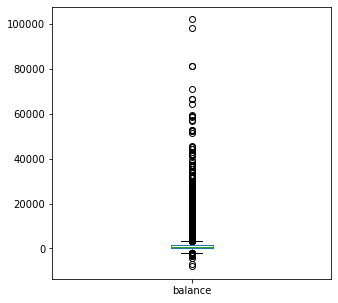

In [17]:
df.boxplot(column='balance', grid=False, figsize=(5,5))

<AxesSubplot:>

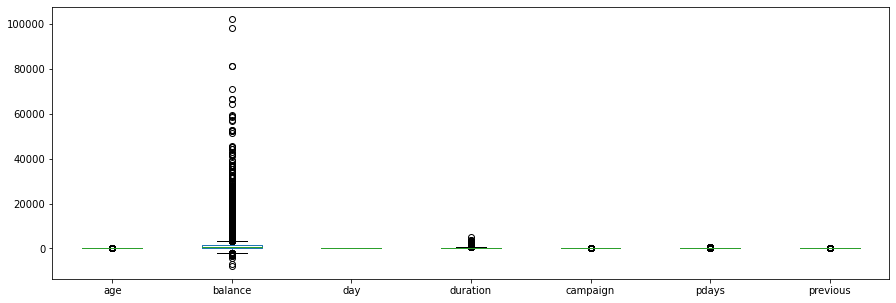

In [10]:
df.boxplot(grid=False, figsize=(15,5))

_____________________
### Substituição dos outliers pela mediana 

In [18]:
def replace_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1

    fence_low = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr

    df_in.loc[(df_in[col_name] < fence_low) , col_name] = df_in[col_name].median() 
    df_in.loc[(df_in[col_name] > fence_high) , col_name] = df_in[col_name].median() 
    
    return df_in[col_name]

<AxesSubplot:>

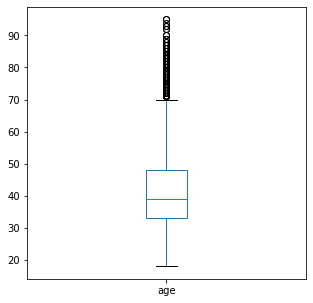

In [19]:
df.boxplot(column='age', grid=False, figsize=(5,5))

In [20]:
df['age'] = replace_outlier(df, 'age')

<AxesSubplot:>

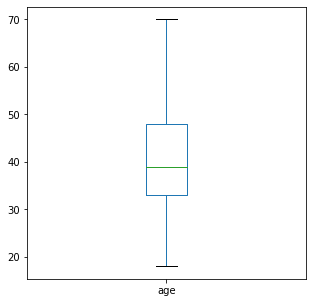

In [21]:
df.boxplot(column='age', grid=False, figsize=(5,5))

In [22]:
df['age'].quantile(0.25) #quartil 25, 25% DA MINHA BASE TEM ABAIXO DE 33 ANOS Q1

33.0

In [23]:
df['age'].quantile(0.75) #quartil 75, 75% DA MINHA BASE TEM ABAIXO DE 48 ANOS Q3

48.0

In [24]:
df['age'].median()

39.0

<AxesSubplot:>

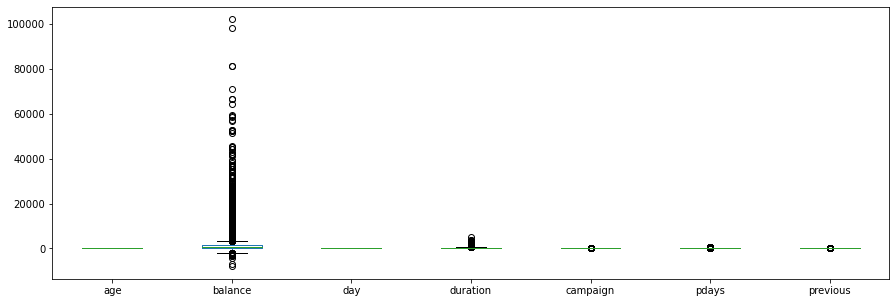

In [25]:
df.boxplot(grid=False, figsize=(15,5))

In [26]:
df['balance'] = replace_outlier(df, 'balance')
df['day'] = replace_outlier(df, 'day')
df['duration'] = replace_outlier(df, 'duration')
df['campaign'] = replace_outlier(df, 'campaign')
df['pdays'] = replace_outlier(df, 'pdays')
df['previous'] = replace_outlier(df, 'previous')

<AxesSubplot:>

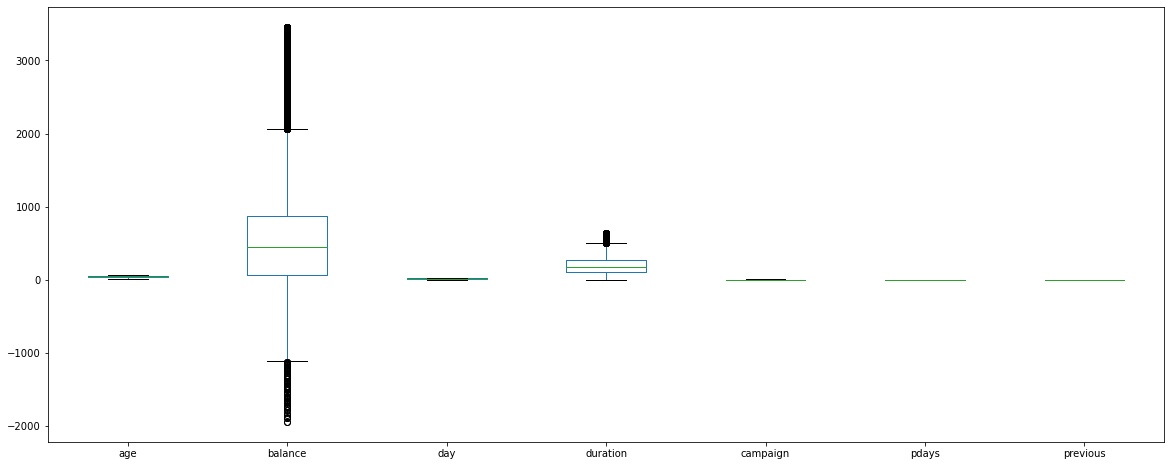

In [40]:
df.boxplot(grid=False, figsize=(20,8))

___________
## Normalização

Existem várias maneiras de normalizarmos/padronizarmos os nossos dados, porém vamos primeiro utilizar a StandardScaler. Essa técnica faz com que os meus dados sejam "forçados" a ter valores onde sua média é igual a 0, e desvio padrão igual a 1.

Documentação sklearn para preprocessing: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
variaveis = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
variaveis

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [31]:
df_norm = scaler.fit_transform(df[variaveis])

In [32]:
type(df_norm)

numpy.ndarray

In [33]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown


In [34]:
df_norm_2 = pd.DataFrame(df_norm, columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])

In [35]:
df_norm_2.head()

,age,balance,day,duration,campaign,pdays,previous
0,1.760223,1.900256,-1.298476,0.435837,-0.882181,0.0,0.0
1,0.349717,-0.738238,-1.298476,-0.374133,-0.882181,0.0,0.0
2,-0.758537,-0.771936,-1.298476,-0.926386,-0.882181,0.0,0.0
3,0.651969,1.105214,-1.298476,-0.808572,-0.882181,0.0,0.0
4,-0.758537,-0.773185,-1.298476,-0.028055,-0.882181,0.0,0.0


In [36]:
type(df_norm)

numpy.ndarray

<AxesSubplot:>

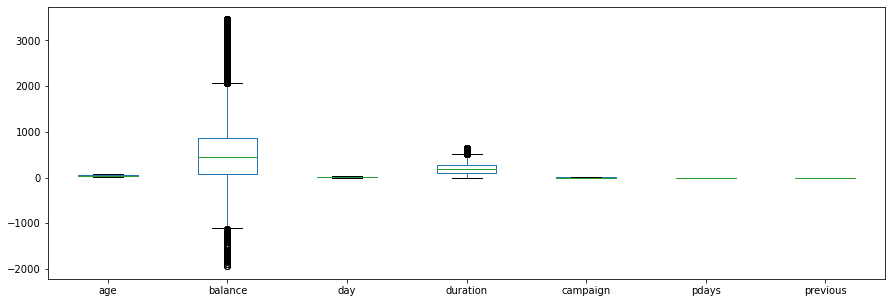

In [37]:
df.boxplot(grid=False, figsize=(15,5))

In [38]:
df_norm_2['age'] = replace_outlier(df_norm_2, 'age')
df_norm_2['balance'] = replace_outlier(df_norm_2, 'balance')
df_norm_2['day'] = replace_outlier(df_norm_2, 'day')
df_norm_2['duration'] = replace_outlier(df_norm_2, 'duration')
df_norm_2['campaign'] = replace_outlier(df_norm_2, 'campaign')
df_norm_2['pdays'] = replace_outlier(df_norm_2, 'pdays')
df_norm_2['previous'] = replace_outlier(df_norm_2, 'previous')

<AxesSubplot:>

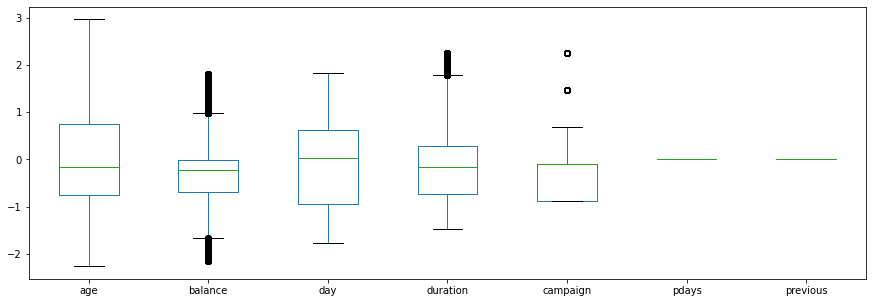

In [39]:
df_norm_2.boxplot(grid=False, figsize=(15,5))

In [66]:
df_norm_2.mean()

age        -1.700125e-15
balance     3.070663e-15
day        -9.219436e-15
duration    5.560938e-17
campaign    1.254699e-14
pdays      -1.395817e-13
previous    1.355210e-13
dtype: float64

In [67]:
df_norm_2.std()

age         1.000011
balance     1.000011
day         1.000011
duration    1.000011
campaign    1.000011
pdays       1.000011
previous    1.000011
dtype: float64

<AxesSubplot:>

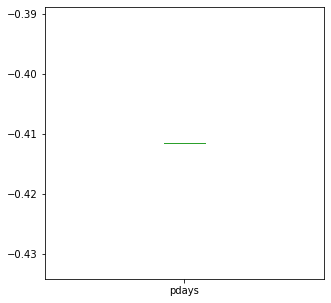

In [31]:
df_norm_2.boxplot(grid=False, figsize=(5,5), column=['pdays'])

____________________
# Data mining

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('carros.csv')

In [40]:
df.head()

,riskiness,losses,make,fuel type,city mpg,highway mpg,aspiration,doors,body,drive,...,engine type,cylinders,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,price
0,2,164.0,audi,gas,24.0,30.0,std,four,sedan,fwd,...,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,13950
1,2,164.0,audi,gas,18.0,22.0,std,four,sedan,4wd,...,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,17450
2,1,158.0,audi,gas,19.0,25.0,std,four,sedan,fwd,...,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,17710
3,1,158.0,audi,gas,17.0,20.0,turbo,four,sedan,fwd,...,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,23875
4,2,192.0,bmw,gas,23.0,29.0,std,two,sedan,rwd,...,ohc,four,108,mpfi,3.50,2.8,8.8,101,5800,16430


In [41]:
df.shape

(165, 26)

In [42]:
df['losses'].fillna(df['losses'].median(), inplace=True)
df['city mpg'].fillna(df['city mpg'].median(), inplace=True)
df['highway mpg'].fillna(df['highway mpg'].median(), inplace=True)

C:\Users\Marcela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

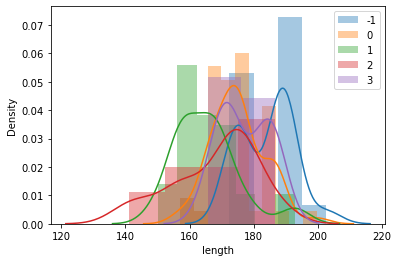

In [43]:
sns.distplot(df[df.riskiness == -1].length,label='-1')
sns.distplot(df[df.riskiness == 0].length,label='0')
sns.distplot(df[df.riskiness == 1].length,label='1')
sns.distplot(df[df.riskiness == 2].length,label='2')
sns.distplot(df[df.riskiness == 3].length,label='3')
plt.legend()